## Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## EDA

In [53]:
df_train = pd.read_csv('emnist-letters-train.csv')
df_train

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_test = pd.read_csv('emnist-letters-test.csv')
df_test

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_train = pd.read_csv('emnist-letters-train.csv', header=None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_test = pd.read_csv('emnist-letters-test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

In [57]:
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (88800, 785)
Test shape: (14800, 785)


In [58]:
df_merge = pd.concat([df_train, df_test])

samples_per_class = 100

balanced_df = pd.concat([
    df_merge[df_merge[0] == class_id].sample(samples_per_class, random_state=42)
    for class_id in range(1, 27)
])

print(balanced_df)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
2533     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
63465    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
14972    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88265    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
78382    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5583    26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
33927   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88423   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
16008   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30594   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
2533    

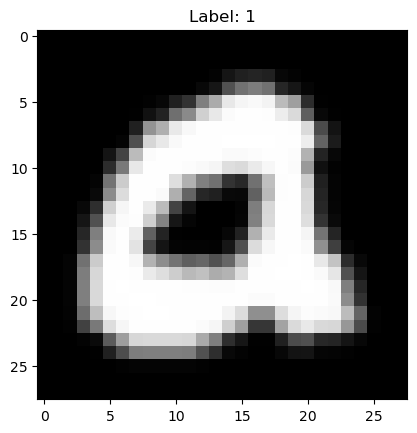

In [59]:
def show_image(row):
    image = row[1:].values.reshape(28, 28).T
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {int(row[0])}')
    plt.show()

show_image(balanced_df.iloc[0])

In [60]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2596,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2598,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X = balanced_df.iloc[:, 1:].values  # fitur (gambar)
y = balanced_df.iloc[:, 0].values   # label (kelas huruf A-Z)

# Shuffle dan bagi 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## HOG

In [62]:
hog_params = {
    'orientations': 6,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (4, 4),
    'block_norm': 'L2'
}

def extract_hog_features(images):
    features = []
    for row in images:
        image = row.reshape(28, 28).T  # Transpose agar orientasi benar
        hog_feature = hog(image, **hog_params)
        features.append(hog_feature)
    return np.array(features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print(f"HOG feature size (train): {X_train_hog.shape}")
print(f"HOG feature size (test): {X_test_hog.shape}")

HOG feature size (train): (2080, 1536)
HOG feature size (test): (520, 1536)


## Training

In [63]:
clf = SVC(
    kernel = 'poly',
    C = 10.0,
    gamma = 1
)

In [64]:
clf.fit(X_train_hog, y_train)

SVC(C=10.0, gamma=1, kernel='poly')

In [65]:
y_pred = clf.predict(X_test_hog)

## Evaluation

In [66]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.85      0.74        20
           2       0.85      0.85      0.85        20
           3       0.89      0.85      0.87        20
           4       0.78      0.90      0.84        20
           5       0.86      0.95      0.90        20
           6       0.76      0.80      0.78        20
           7       0.74      0.70      0.72        20
           8       0.95      0.95      0.95        20
           9       0.72      0.65      0.68        20
          10       0.84      0.80      0.82        20
          11       0.95      0.90      0.92        20
          12       0.75      0.75      0.75        20
          13       0.95      0.95      0.95        20
          14       0.84      0.80      0.82        20
          15       0.85      0.85      0.85        20
          16       0.90      0.90      0.90        20
          17       0.88      0.70      0.78        20
  

In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8423076923076923
Precision (macro): 0.8456404894465975
Recall (macro): 0.8423076923076922
F1 Score (macro): 0.8421765396070338


In [68]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision (macro): {:.2f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall (macro): {:.2f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 Score (macro): {:.2f}".format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.84
Precision (macro): 0.85
Recall (macro): 0.84
F1 Score (macro): 0.84


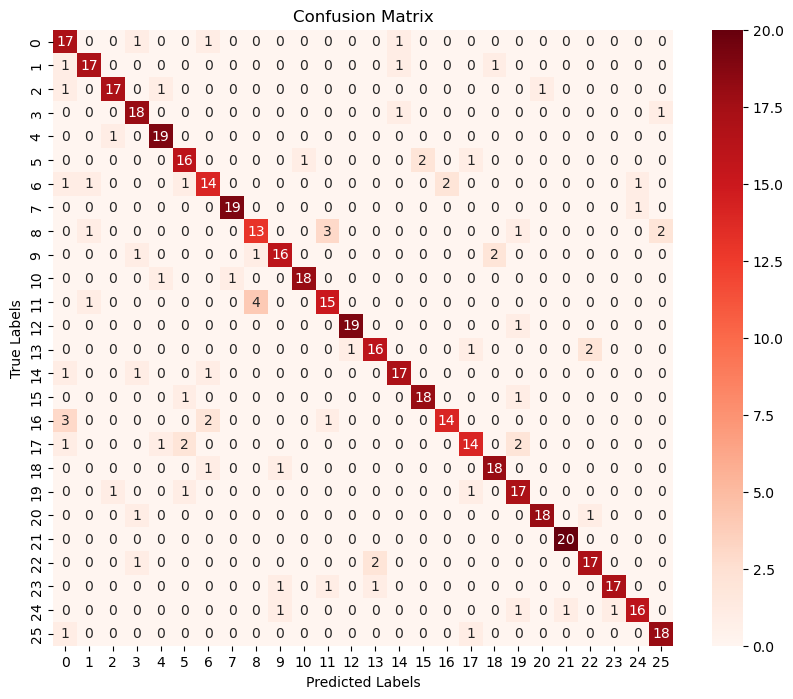

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

=== Evaluation on Training Set ===

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        80
          15       1.00      1.00      1.00        80
          16       1.00      1.00      1.00        80
          17       1.

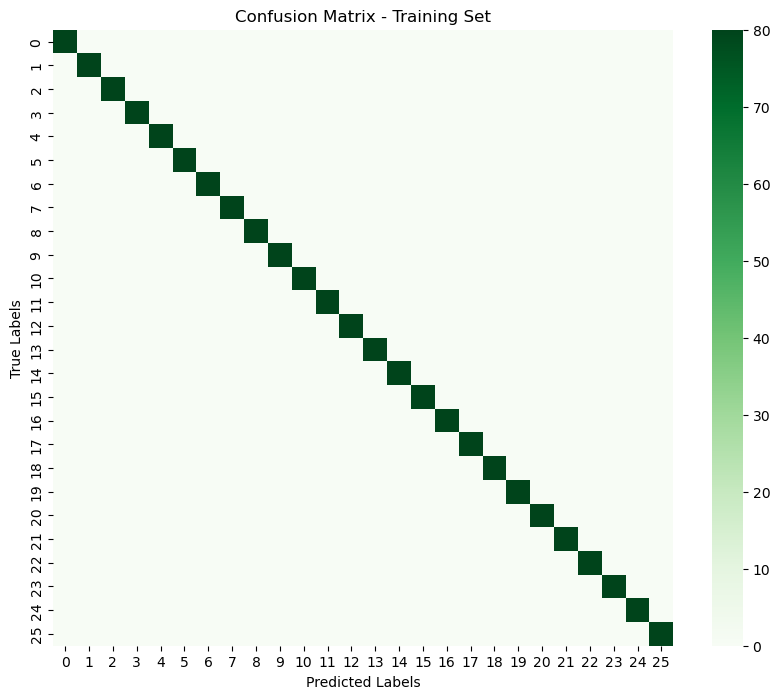

In [70]:
y_train_pred = clf.predict(X_train_hog)

print("=== Evaluation on Training Set ===")
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision (macro):", precision_score(y_train, y_train_pred, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=False, cmap='Greens')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

=== Evaluation on Test Set ===

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.85      0.74        20
           2       0.85      0.85      0.85        20
           3       0.89      0.85      0.87        20
           4       0.78      0.90      0.84        20
           5       0.86      0.95      0.90        20
           6       0.76      0.80      0.78        20
           7       0.74      0.70      0.72        20
           8       0.95      0.95      0.95        20
           9       0.72      0.65      0.68        20
          10       0.84      0.80      0.82        20
          11       0.95      0.90      0.92        20
          12       0.75      0.75      0.75        20
          13       0.95      0.95      0.95        20
          14       0.84      0.80      0.82        20
          15       0.85      0.85      0.85        20
          16       0.90      0.90      0.90        20
          17       0.88  

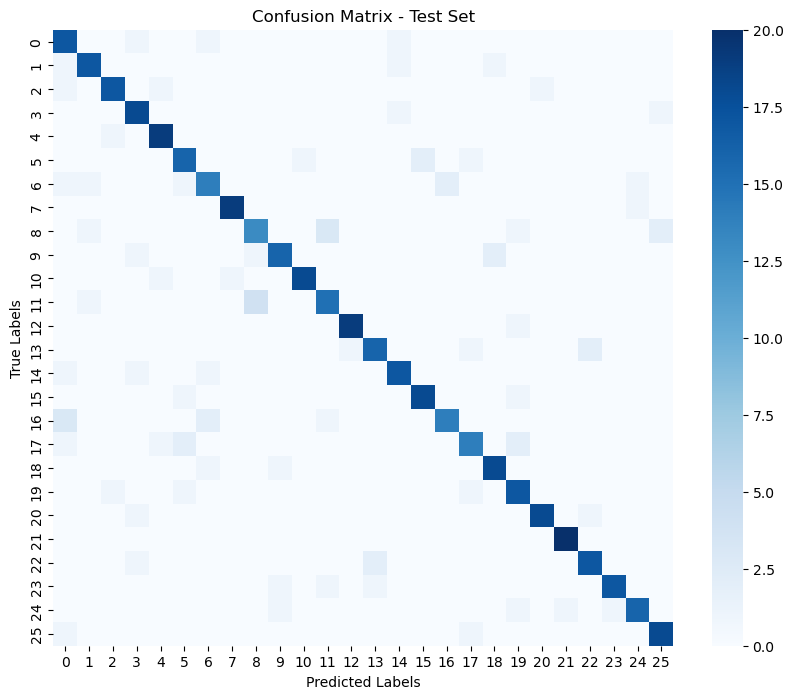

In [71]:
y_test_pred = clf.predict(X_test_hog)

print("=== Evaluation on Test Set ===")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision (macro):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=False, cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Hypertuning

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [73]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear','poly', 'rbf', 'sigmoid']
}

In [74]:
svc = SVC()
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=2
)

In [75]:
grid_search.fit(X_train_hog, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [76]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.8230769230769232


In [77]:
best_model = grid_search.best_estimator_

In [78]:
y_test_pred = best_model.predict(X_test_hog)
print("\n=== Evaluation on Test Set with Best Model ===")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision (macro):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))


=== Evaluation on Test Set with Best Model ===

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.85      0.74        20
           2       0.85      0.85      0.85        20
           3       0.89      0.85      0.87        20
           4       0.78      0.90      0.84        20
           5       0.86      0.95      0.90        20
           6       0.76      0.80      0.78        20
           7       0.74      0.70      0.72        20
           8       0.95      0.95      0.95        20
           9       0.72      0.65      0.68        20
          10       0.84      0.80      0.82        20
          11       0.95      0.90      0.92        20
          12       0.75      0.75      0.75        20
          13       0.95      0.95      0.95        20
          14       0.84      0.80      0.82        20
          15       0.85      0.85      0.85        20
          16       0.90      0.90      0.90        20
        